## Wavelet Practice: Spy Sounds

A door is encoded with a number pad (0-9). We can't see the door, but through nefariouis means we have a recording of someone opening it. Quick, we need to decode this [mystery signal](data/mystery_signal.wav)! The door code is encoded in this mystery_signal.wav file but we need to know what music notes and their order to open it

We know that the door code is set up as:
- A note: 0
- B note: 1
- C note: 2
- D note: 3
- E note: 4
- F note: 5

In [15]:
import IPython
print("Give it a listen!")
IPython.display.Audio("data/mystery_signal.wav")

Give it a listen!


In [16]:
# note frequency in hz
a_freq = 440
print(f"A note {a_freq} hz")
b_freq = 494
print(f"B note {b_freq} hz")
c_freq = 261
print(f"C note {c_freq} hz")
d_freq = 293
print(f"D note {d_freq} hz")
e_freq = 350
print(f"E note {e_freq} hz")
f_freq = 391
print(f"F note {f_freq} hz")

A note 440 hz
B note 494 hz
C note 261 hz
D note 293 hz
E note 350 hz
F note 391 hz


First, let's us extract and review the raw audio .wav file

In [17]:
import ipywidgets
import pandas as pd
import numpy as np

In [18]:
# Extract audio .wav file
import scipy.io.wavfile
sampleRate, audioBuffer = scipy.io.wavfile.read("data/mystery_signal.wav")

audioBuffer = np.float64(audioBuffer) # translate to 64 to avoid overflow error when normalizing

# Amplitude determines the volume of thes ound
# Frequency determines the chord

audioBuffer = (audioBuffer - np.min(audioBuffer)) / (np.max(audioBuffer) - np.min(audioBuffer)) # normalize data
duration = len(audioBuffer) / sampleRate
time = np.arange(0, duration, 1/sampleRate) 

print(f"Sample Rate: {sampleRate}")
print(f"duration = {duration} seconds (sample rate and audioBuffer = {len(audioBuffer)} / {sampleRate}")
print(f"len of audio file = {len(audioBuffer)}")
print(f"Total Length in time = {len(time)}")

Sample Rate: 10000
duration = 6.0 seconds (sample rate and audioBuffer = 60000 / 10000
len of audio file = 60000
Total Length in time = 60000


In [19]:
# skip 0 time step
signal_df = pd.DataFrame({'time (seconds)': time[1:], 'amplitude': audioBuffer[1:]})
signal_df.head()

,time (seconds),amplitude
0,0.0001,0.944778
1,0.0002,0.543450
2,0.0003,0.722240
3,0.0004,0.829877
4,0.0005,0.303792


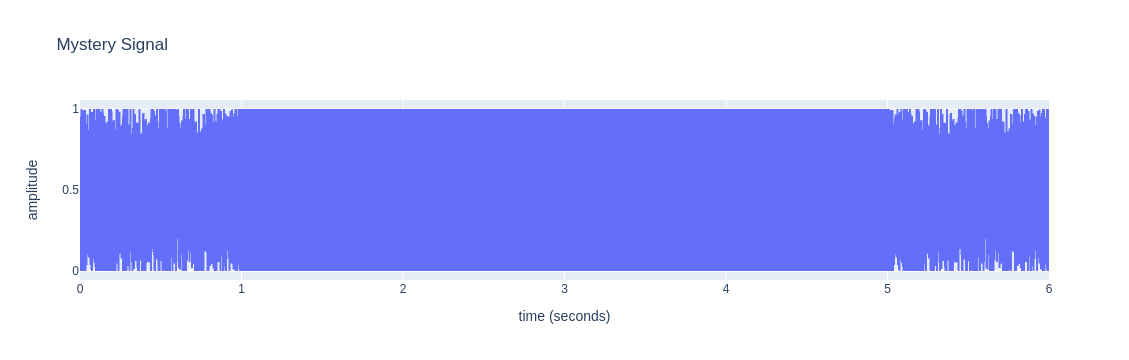

In [20]:
# Plot .wav file
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'jupyterlab'

fig = px.line(data_frame=signal_df, x="time (seconds)", y="amplitude",
              title="Mystery Signal")
fig.show()

In [21]:
import pywt # PyWavelets

In [22]:
wavelet_mother = "morl" # morlet
#dt =  0.01  # 100 Hz sampling 
dt = 1/sampleRate # timestep difference
print(dt)
print(sampleRate)

0.0001
10000


In [23]:
# How to determine width? impacts the y-axis
# WIDTH: IS THE Y-AXIS

In [24]:
#wavelet = pywt.ContinuousWavelet(wavelet_mother)
#print(wavelet)
#print(wavelet.wavefun(level=5))

In [25]:
# scale determinse how squished or stretched a wavelet is
dj = 0.025
s_zero = dt*1000 # otherwise too small
import math
jtot = math.log2((len(audioBuffer)*dt)/s_zero)
scales = np.arange(s_zero, jtot, dj) # scales of morlet wavlet
print(scales)
print(s_zero)
print(jtot)
print(len(scales))
frequencies = pywt.scale2frequency(wavelet_mother, scales) / dt
#print(f"length of frequences = {len(frequencies)}")
print(frequencies)
print(min(frequencies))
print(max(frequencies))
# frequences associated with the scales
# Create a filter to select frequencies between 80Hz and 400KHz
#upper = ([x for x in range(len(widths)) if frequencies[x] > 1000])[-1]
#lower = ([x for x in range(len(widths)) if frequencies[x] < 800])[0]
#widths = widths[upper:lower] # Select scales in this frequency range
#print(f"\nfiltered widths = \n{widths}")

[0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275 0.3   0.325 0.35  0.375
 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575 0.6   0.625 0.65  0.675
 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875 0.9   0.925 0.95  0.975
 1.    1.025 1.05  1.075 1.1   1.125 1.15  1.175 1.2   1.225 1.25  1.275
 1.3   1.325 1.35  1.375 1.4   1.425 1.45  1.475 1.5   1.525 1.55  1.575
 1.6   1.625 1.65  1.675 1.7   1.725 1.75  1.775 1.8   1.825 1.85  1.875
 1.9   1.925 1.95  1.975 2.    2.025 2.05  2.075 2.1   2.125 2.15  2.175
 2.2   2.225 2.25  2.275 2.3   2.325 2.35  2.375 2.4   2.425 2.45  2.475
 2.5   2.525 2.55  2.575 2.6   2.625 2.65  2.675 2.7   2.725 2.75  2.775
 2.8   2.825 2.85  2.875 2.9   2.925 2.95  2.975 3.    3.025 3.05  3.075
 3.1   3.125 3.15  3.175 3.2   3.225 3.25  3.275 3.3   3.325 3.35  3.375
 3.4   3.425 3.45  3.475 3.5   3.525 3.55  3.575 3.6   3.625 3.65  3.675
 3.7   3.725 3.75  3.775 3.8   3.825 3.85  3.875 3.9   3.925 3.95  3.975
 4.    4.025 4.05  4.075 4.1   4.125 4.15  4.175 4.

In [26]:
wavelet_coeffs, freqs = pywt.cwt(audioBuffer, scales, wavelet = wavelet_mother, sampling_period= dt)
# Shape of wavelet transform
print(wavelet_coeffs.shape)
print(pd.DataFrame(wavelet_coeffs).head())
print(f"y-axis be default is: {wavelet_coeffs.shape[0]}")
print(f"x-axis be default is: {wavelet_coeffs.shape[1]}")

(233, 60000)
      0             1             2             3         4         5      \
0  0.000391 -5.729793e-04  2.552602e-04  1.536746e-04 -0.000751  0.000903   
1 -0.000002  8.727470e-07  7.224176e-08 -6.507302e-07  0.000002 -0.000001   
2  0.001754  7.187953e-04 -1.050779e-03  4.674366e-04  0.000284 -0.001379   
3 -0.003804 -1.625062e-03  2.323227e-03 -1.009441e-03 -0.000688  0.003100   
4  0.001101 -5.878182e-04  3.372899e-05  3.651208e-04 -0.000977  0.000850   

          6             7             8             9      ...         59990  \
0 -5.020894e-04  3.564972e-04 -5.486668e-04  4.350556e-05  ...  2.615998e-04   
1  1.167913e-07 -2.439388e-07  8.568724e-07  5.339641e-07  ... -4.089584e-08   
2  1.656627e-03 -9.211140e-04  6.547697e-04 -1.005681e-03  ... -8.947596e-04   
3 -3.671694e-03  2.048484e-03 -1.482717e-03  2.205451e-03  ...  1.982254e-03   
4 -1.959391e-04  2.193888e-04 -5.727217e-04 -2.533991e-04  ...  8.989659e-05   

      59991         59992         59993    

(233, 60000)
nan


/tmp/ipykernel_25294/3043618043.py:22: UserWarning:

Attempt to set non-positive ylim on a log-scaled axis will be ignored.



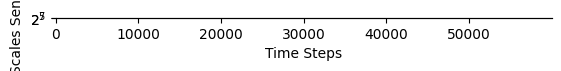

In [27]:
#Cut down and only display the first x elements of each (for preformance)

# X-axis: time
# Y-axis: scale
# scale corresponds to signal periodicity that the transform is sensitive to

step = None
#print(pd.DataFrame(wavelet_coeffs[:,:step]).head(2))
print(wavelet_coeffs.shape)
#print(wavelet_coeffs[:,:step].shape)
#fig = px.imshow(wavelet_coeffs[:,:step], title="Wavelet Coeffs")
#fig.show()
import matplotlib.pyplot as plt
plt.xscale('linear')
plt.yscale('log', base=2)
plt.xlabel("Time Steps")
plt.ylabel("Scales Sensitive")
data = np.square(np.absolute(wavelet_coeffs[:,:step]))
data[data<.0001]=np.nan # filter out small numbers
data = np.where(data!= 0, np.log2(data), np.nan)
print(np.min(data))
plt.imshow(data, cmap="RdBu_r")
#plt.imshow(wavelet_coeffs, cmap="coolwarm")

In [28]:
# Cone of Influence: COI
# Shows regions of scalogram that are potentionally being impacted by the edge-effect where streched wavelets extend beyond the edge of an interval
# matlab breakdown: https://www.mathworks.com/help/wavelet/ug/boundary-effects-and-the-cone-of-influence.html
#Cut down and only display the first x elements of each (for preformance)
# Example of how x elements are cut off
numbers = np.array([[1, 2, 3, 4, 5],[6, 7, 8, 9, 10],[11, 12, 13, 14, 15]])
print(numbers.shape)
print(numbers[:,:2])

(3, 5)
[[ 1  2]
 [ 6  7]
 [11 12]]
